The goal of this project is to use patient data (such as age, gender, medical history, and lifestyle factors) to predict the likelihood of a stroke occurring. 

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [78]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [79]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
data['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

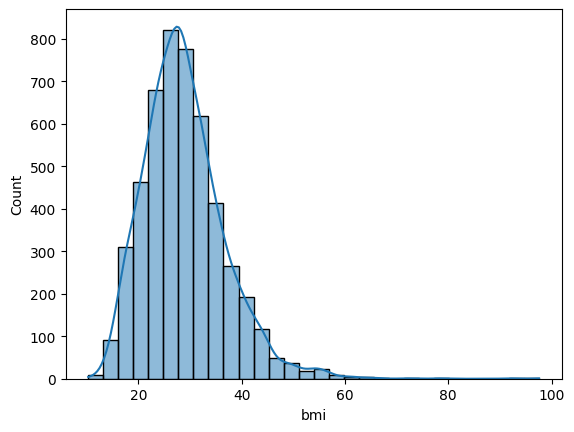

In [82]:
sns.histplot(data=data, x = 'bmi', bins =30, kde=True)

In [83]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

C:\Users\91770\AppData\Local\Temp\ipykernel_1532\3685616333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [84]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [85]:
data = pd.get_dummies(data=data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_Yes                5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

<Axes: xlabel='age', ylabel='Count'>

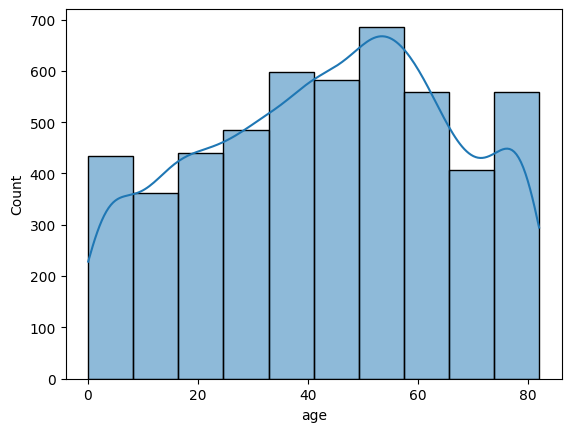

In [87]:
sns.histplot(data, x = 'age', bins =10, kde=True)

<Axes: xlabel='hypertension', ylabel='count'>

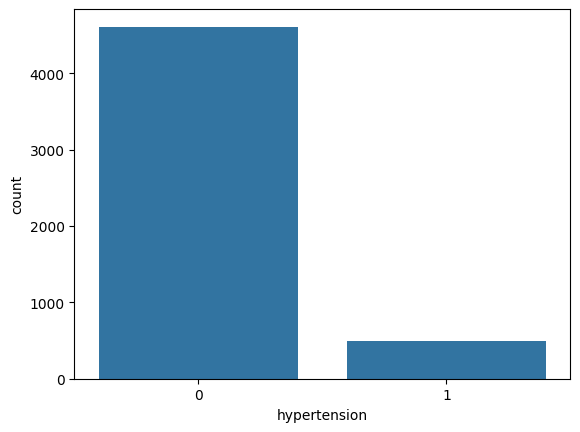

In [88]:
sns.countplot(data=data, x = 'hypertension')

<Axes: xlabel='heart_disease', ylabel='count'>

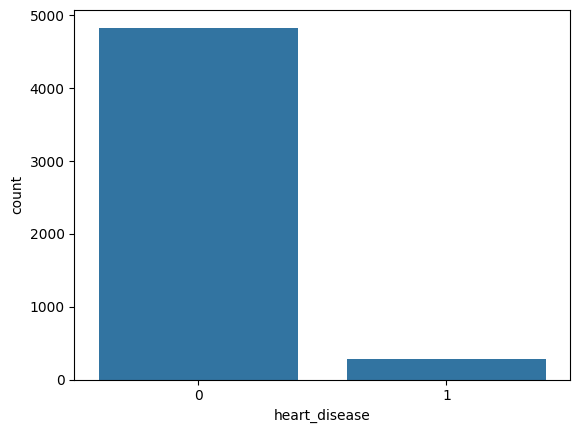

In [89]:
sns.countplot(data, x = 'heart_disease')

<Axes: xlabel='stroke', ylabel='count'>

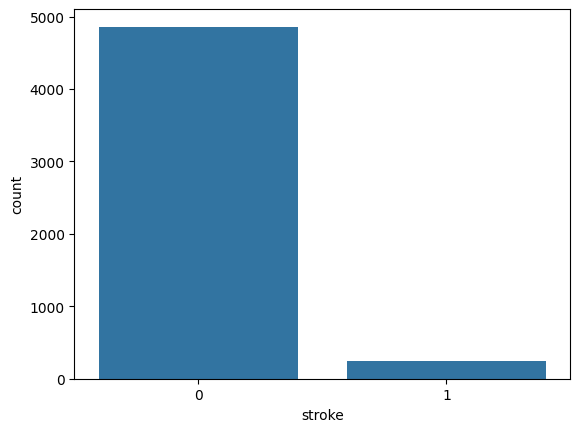

In [90]:
sns.countplot(data, x = 'stroke')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_Yes                5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

In [92]:
numerics = data.select_dtypes(include=['int64', 'float64'])

In [93]:
corr = numerics.corr()

<Axes: >

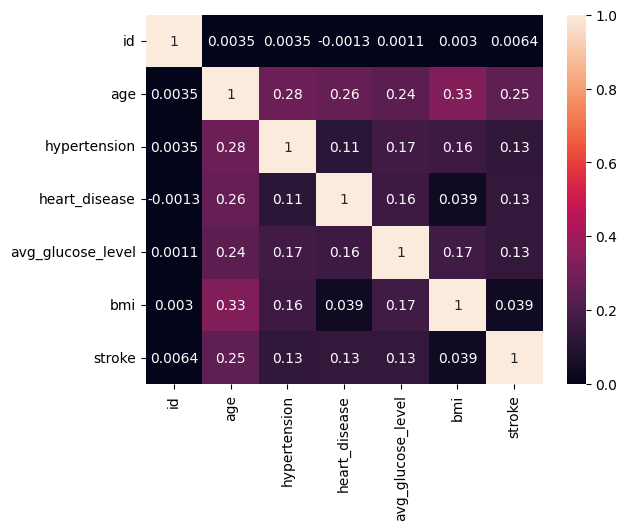

In [94]:
sns.heatmap(corr, annot=True)

In [95]:
categoricals = data.select_dtypes(include=['object'])
categoricals.nunique()

Series([], dtype: float64)

In [96]:
data.drop(columns=['id'], inplace=True)

In [97]:
X = data.drop(columns='stroke', axis=1)

In [98]:
y = data['stroke']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression()

In [103]:
model.fit(X_train, y_train)

C:\Users\91770\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
model.coef_

array([[ 0.07503725,  0.37771999,  0.12538771,  0.0048138 , -0.01446513,
         0.01474203, -0.01562258,  0.07034943, -0.1052444 ,  0.08984293,
        -0.40771084, -2.35625777,  0.01708808,  0.16684148, -0.10771125,
         0.10722186]])

In [105]:
features = X.columns
coefficents = model.coef_[0]

In [106]:
results = pd.DataFrame({'Variables':features, 'Coefficients':coefficents})

In [107]:
results

,Variables,Coefficients
0,age,0.075037
1,hypertension,0.377720
2,heart_disease,0.125388
3,avg_glucose_level,0.004814
4,bmi,-0.014465
5,gender_Male,0.014742
6,gender_Other,-0.015623
7,ever_married_Yes,0.070349
8,work_type_Never_worked,-0.105244
9,work_type_Private,0.089843


In [108]:
results.sort_values(by='Coefficients')

,Variables,Coefficients
11,work_type_children,-2.356258
10,work_type_Self-employed,-0.407711
14,smoking_status_never smoked,-0.107711
8,work_type_Never_worked,-0.105244
6,gender_Other,-0.015623
4,bmi,-0.014465
3,avg_glucose_level,0.004814
5,gender_Male,0.014742
12,Residence_type_Urban,0.017088
7,ever_married_Yes,0.070349


In [109]:
model.intercept_

array([-7.67262014])

In [110]:
y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Text(50.722222222222214, 0.5, 'Actual')

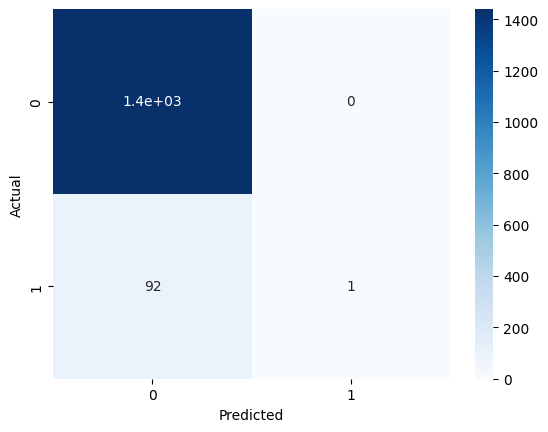

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1440
           1       1.00      0.01      0.02        93

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.94      0.94      0.91      1533



In [114]:
accuracy = accuracy_score(y_test, y_pred)

In [115]:
accuracy

0.9399869536855838